### Freshly trained model, apply test data to prediction
*To debug poor test perf*

We know when we load the training dataset, locally, or in cloud, the results are poor, but when we train freshly and use the dl connected to the learner we get great results.

Therefore, there must be something in the creation of the dataloader that we are not doing correctly...

In [1]:
from fastai2.vision.all import *
import time
import copy
import pickle
import sys
sys.path.append('..')

In [2]:
def piece_class_parse(fn): 
    fn = fn.split('_')[1]
    fn = fn.split('.')[0]
    return fn

In [4]:
path = Path('../../../rf-chess-data/cropped_v1/')

In [6]:
pieces = ImageDataLoaders.from_name_func(
                path, 
                get_image_files(path),
                valid_pct=0.2, 
                seed=42,
                label_func=piece_class_parse, 
#                 item_tfms=Resize(128),
                item_tfms=RandomResizedCrop(128, min_scale=0.5),
                batch_tfms=aug_transforms(),
                )

In [7]:
learn = cnn_learner(pieces, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.557853,0.187651,0.038328,00:18


epoch,train_loss,valid_loss,error_rate,time
0,0.295363,0.107206,0.017422,00:04
1,0.215831,0.093225,0.013937,00:04
2,0.184782,0.083462,0.008711,00:04
3,0.153736,0.083555,0.010453,00:04


In [8]:
interp = ClassificationInterpretation.from_learner(learn)

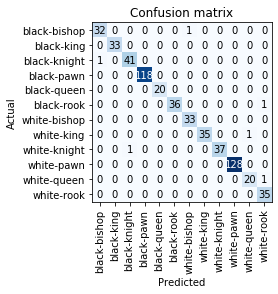

In [9]:
interp.plot_confusion_matrix()

##### Load test set

In [18]:
test_path = Path('../../../other-chess-data/regulation-test-1/')

In [48]:
test_dl = ImageDataLoaders.from_name_func(
                test_path, 
                fnames=get_image_files(test_path),
                valid_pct=0.0, 
                seed=None,# randomSplitter has no effect
                label_func=piece_class_parse,
                item_tfms=RandomResizedCrop(128, min_scale=0.5),
                batch_tfms=aug_transforms(),
                bs=16,
                )

##### Compare how images look in each ... different

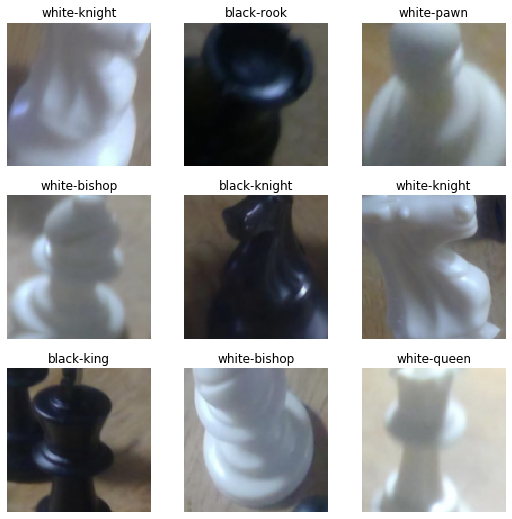

In [50]:
test_dl.show_batch()

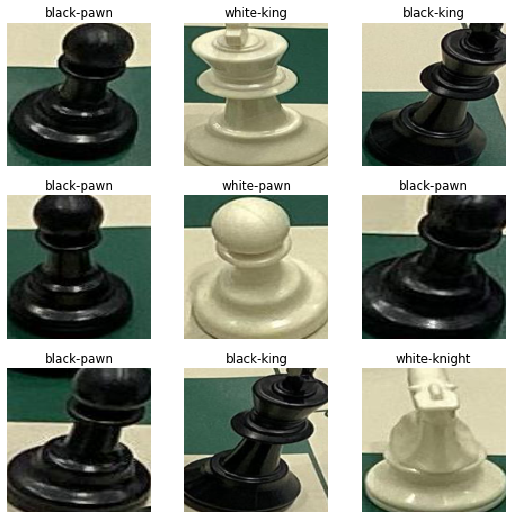

In [53]:
learn.dls[1].show_batch()

In [49]:
test_dl.train

In [44]:
learn.dls[0]

##### Do interpretations

In [56]:
interp_test = ClassificationInterpretation.from_learner(learn,
                                                    dl= test_dl.train)

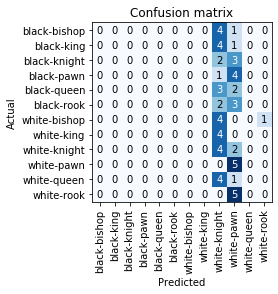

In [57]:
interp_test.plot_confusion_matrix()

In [58]:
interp_train = ClassificationInterpretation.from_learner(learn,
                                                    dl= learn.dls[0])

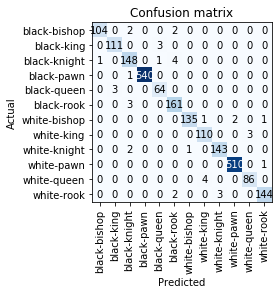

In [59]:
interp_train.plot_confusion_matrix()

In [60]:
interp_valid = ClassificationInterpretation.from_learner(learn,
                                                    dl= learn.dls[1])

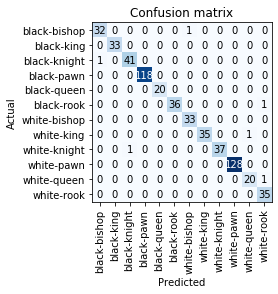

In [61]:
interp_valid.plot_confusion_matrix()